In [13]:
import pandas as pd
import numpy as np

# CO2 - pre 2001

In [2]:
df_co2_pre2001 = pd.read_csv('data/co2/coipcc800kyr-2001.csv')
df_co2_pre2001.head(3)

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10


In [5]:
df_co2_pre2001 = df_co2_pre2001.iloc[:, :2].copy()

In [6]:
df_co2_pre2001.head(3)

,Gasage (yr BP),CO2 (ppmv)
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65


In [18]:
df_co2_pre2001['Gasage (abs yr)'] = (np.negative(
                                            df_co2_pre2001['Gasage (yr BP) ']) 
                                    + 1950)


In [19]:
df_co2_pre2001.head(3)

,Gasage (yr BP),CO2 (ppmv),Gasage (abs yr)
0,-51.03,368.02,2001.03
1,-48.00,361.78,1998.00
2,-46.28,359.65,1996.28


# CO2 - 2001 to 2022

In [8]:
df_co2_post2001 = pd.read_csv('data/co2/conoaa1979-2022.csv', skiprows=37)

In [9]:
df_co2_post2001.head(3)

,year,mean,unc
0,1979,336.85,0.11
1,1980,338.91,0.07
2,1981,340.11,0.09


In [34]:
df_co2_post2001.rename(columns={'mean': 'CO2 (ppmv)'}, inplace=True)

In [35]:
df_co2_post2001.iloc[:, :2].head(3)

,year,CO2 (ppmv)
0,1979,336.85
1,1980,338.91
2,1981,340.11


In [26]:
df_co2_pre2001.rename(columns={'Gasage (abs yr)': 'year'}, inplace=True)

In [27]:
df_co2_pre2001.head(2)

,Gasage (yr BP),CO2 (ppmv),year
0,-51.03,368.02,2001.03
1,-48.00,361.78,1998.00


In [37]:
df_co2 = pd.concat([df_co2_pre2001.iloc[:, 1:], df_co2_post2001.iloc[:, :2] ])

In [39]:
df_co2.sort_values('year', inplace=True)

In [40]:
df_co2.head(3)

,CO2 (ppmv),year
1900,207.29,-803718.87
1899,202.23,-803182.44
1898,204.86,-802572.67


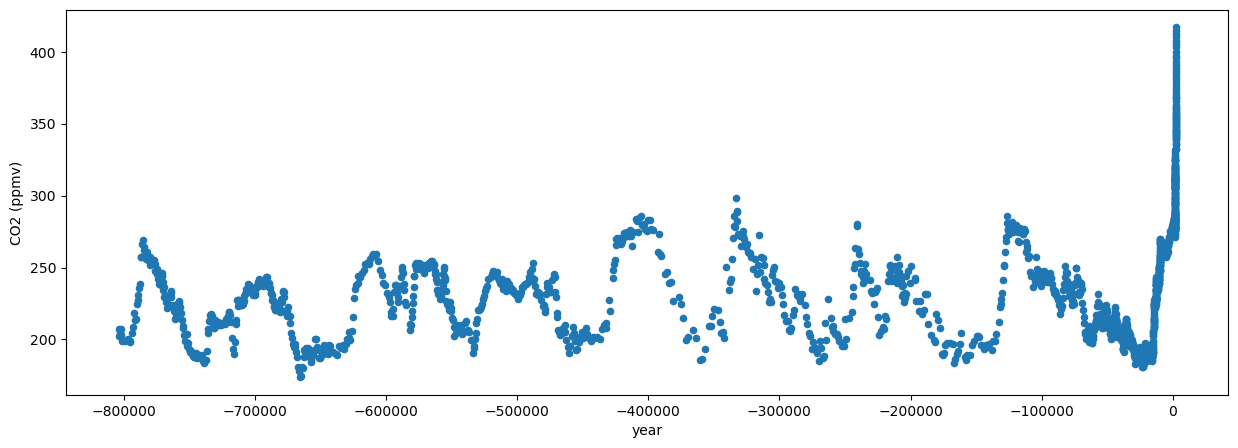

In [43]:
df_co2.plot.scatter(x='year', y='CO2 (ppmv)', figsize=(15,5));